In [1]:
#paths
# dell laptop
methods_path = 'C:/Users/sapje1/code/python_mrdatamethods/'
diffdir_path = 'C:/Users/sapje1/OneDrive - Cardiff University/MR Physics & Equipment/protocols/Diffusion/Connectom/MGH_Diff'

In [2]:
#paths
# wl026
methods_path = '/home/sapje1/code/python_mrobjects'
#diffdir_path = '/home/sapje1/MR/diffusion/MGH_Diff'
diffdir_path = '/home/sapje1/MR/diffusion/alix_hyperfine'

In [3]:
# script to check siemens diffusion direction file
import os
import sys
sys.path.append(methods_path)
import diffusion_directions.siemensdirclass as dirn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# directions for Alix Hyperfine matched pairs
filelist = os.listdir(diffdir_path)
f_cam = filelist[0]
f_icos = filelist[1]
f_tet = filelist[2]
print(f_cam + f_icos + f_tet)

Camino_OPS_bvec_bval.txtbvec_icos.txtbvec_tet.txt


In [9]:
# deals with the small files, which have different ordering of directions (for Hyperfine)
# compared with Siemens convention
def proc_alix(file_in, file_out, skip, reorder):
    '''
    file_in: input filename
    file_out: output filename
    skip: text file rows to skip (header)
    reorder: True/False.  Is input in Hyperfine format, reorder if yes.
    '''
    diff = np.loadtxt(f_name, skiprows=skip)
    if reorder:
        print('input directions (Hyperfine SI, AP, LR)')
        print(diff)
        diff_reordered = diff[:,1:3]
        diff_reordered = np.append(diff_reordered, diff[:,0].reshape([ len(diff[:,0]),1] ), axis=1)
        print('output directions (Siemens X,Y,Z)')
    else:
        diff_reordered = diff[:,0:3]
        print('output directions (not reordered)')

    print(diff_reordered)
    diff_dirn = dirn.SiemensDir(file_in)
    diff_dirn.setdir(diff_reordered)
    %matplotlib inline
    diff_dirn.plotsphere()
    diff_dirn.writedirfile(file_out)

input directions (Hyperfine SI, AP, LR)
[[ 0.     0.     0.   ]
 [ 0.618  1.     0.   ]
 [ 0.618 -1.     0.   ]
 [ 0.     0.618  1.   ]
 [ 0.     0.618 -1.   ]
 [ 1.     0.     0.618]
 [-1.     0.     0.618]]
output directions (Siemens X,Y,Z)
[[ 0.     0.     0.   ]
 [ 1.     0.     0.618]
 [-1.     0.     0.618]
 [ 0.618  1.     0.   ]
 [ 0.618 -1.     0.   ]
 [ 0.     0.618  1.   ]
 [ 0.     0.618 -1.   ]]
7
Opened alix1_icos.dir for writing


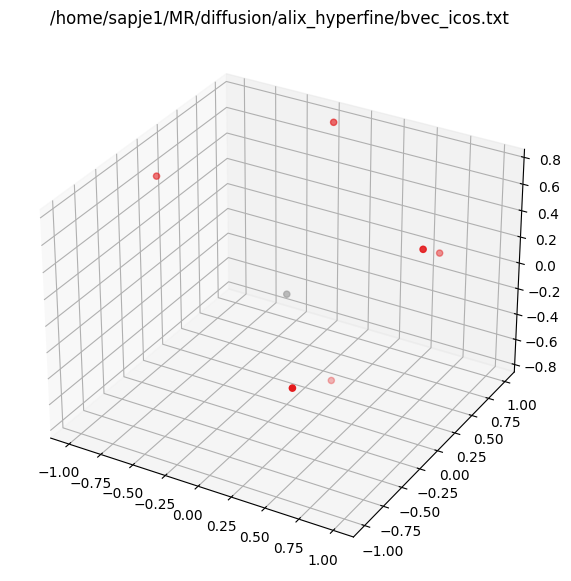

In [6]:
f_name = os.path.join(diffdir_path, f_icos)
proc_alix(f_name, 'alix1_icos.dir', 1, True)

input directions (Hyperfine SI, AP, LR)
[[ 0.    0.    0.  ]
 [ 0.68  0.68  0.68]
 [ 0.68  0.68 -0.68]
 [ 0.68 -0.68  0.68]
 [-0.68  0.68  0.68]]
output directions (Siemens X,Y,Z)
[[ 0.    0.    0.  ]
 [ 0.68  0.68  0.68]
 [ 0.68 -0.68  0.68]
 [-0.68  0.68  0.68]
 [ 0.68  0.68 -0.68]]
5
Opened alix2_tet.dir for writing


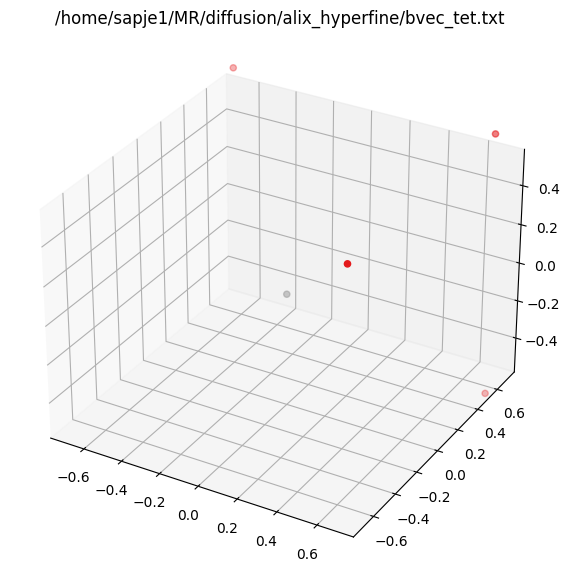

In [7]:
f_name = os.path.join(diffdir_path, f_tet)
proc_alix(f_name, 'alix2_tet.dir', 1, True)

output directions (not reordered)
[[ 0.066042  0.996389  0.053365]
 [-0.197936  0.495458  0.845779]
 [ 0.256857 -0.585829  0.768654]
 [-0.702744 -0.507748  0.498341]
 [ 0.813508 -0.578233 -0.062058]
 [ 0.825805  0.103849  0.554312]
 [ 0.555199  0.740447  0.378803]
 [ 0.036415 -0.055852  0.997775]
 [-0.937095  0.043562  0.346345]
 [-0.199968 -0.865116  0.459987]
 [-0.356683  0.85752   0.370725]
 [ 0.711156 -0.521238  0.471772]
 [-0.556651 -0.007596  0.830712]
 [-0.921415 -0.388399  0.011887]
 [ 0.336118  0.380412  0.861575]
 [-0.379188  0.892039 -0.245933]
 [-0.274164 -0.475434  0.835941]
 [-0.672867  0.462511  0.577351]
 [ 0.615572 -0.082775  0.783722]
 [ 0.580413  0.813958  0.02438 ]
 [ 0.959601 -0.078081  0.270313]
 [ 0.236383  0.809263  0.537788]
 [-0.783756 -0.168342  0.597819]
 [ 0.155602 -0.836028  0.526161]
 [ 0.739159  0.451895  0.499434]
 [ 0.552853 -0.830607 -0.066672]
 [-0.256259  0.154151  0.954237]
 [ 0.324296 -0.258502  0.90995 ]
 [-0.313221 -0.938246  0.146922]
 [-0.9966

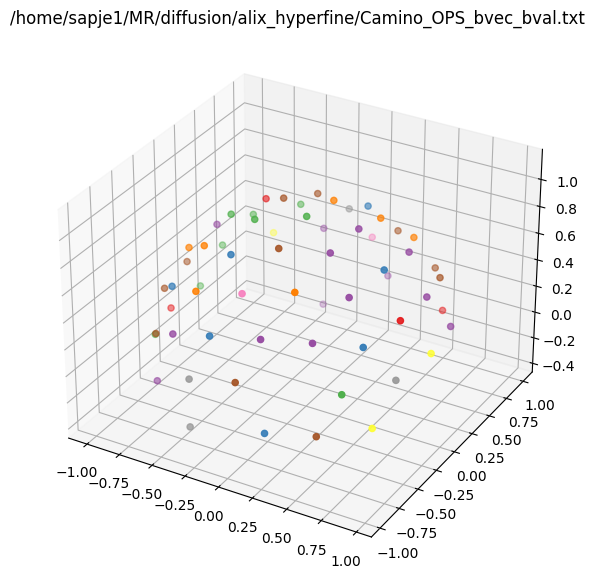

In [10]:
f_name = os.path.join(diffdir_path, f_cam)
proc_alix(f_name, 'alix3_cam.dir', 3, False)